## This file has coding for random number generators for various distribution <br><br>

1. (LGM) Lewis Goodman, Miller - IBM
2. Bernoulli
3. Binomial
4. Poisson
5. Exponential
6. Gamma
7. Normal Distribution 
    7.1 Box-Muller Method
    7.2 Polar-Marsaglia Method
8. Uniform normal


1. Use the Random Number generators discussed in the class to do the following:
(a) Using LGM method generate 10,000 Uniformly distributed random numbers on [0,1] and compute the empirical mean and the standard deviation of the sequence.
(b) Now use built-in functions of whatever software you are using to do the same thing as in (a).
(c) Compare your findings in (a) and (b) and comment (be short but precise).

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [5]:
def lgm(x0,n):       
    a = 7**5
    m = 2**31-1
    x = x0
    rand_uni=np.empty(n)
    for i in range(0,n):       
        x = (a*x) % m
        rand_uni[i]=x/m
    return rand_uni

In [7]:
rand_lgm = lgm(np.random.randint(1,50),10000)  
rand_lgm

array([3.28707509e-04, 5.24587102e-01, 7.35423532e-01, ...,
       9.41892732e-02, 3.91153000e-02, 4.10846337e-01])

In [8]:
std_lgm = np.std(rand_lgm)
std_lgm

0.28905887551012405

In [9]:
mean_lgm = np.mean(rand_lgm)
mean_lgm

0.49602653275054254

The built in random numbers have a slightly smaller standard deviation.
The deviation from the true mean are about the same for both methods.


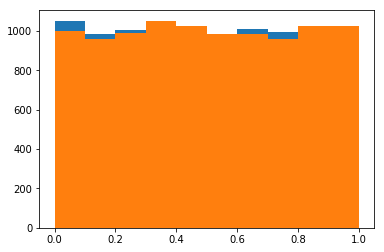

In [10]:
rand_builtin = np.random.uniform(0,1,10000)
mean_builtin = np.mean(rand_builtin)
std_builtin = np.std(rand_builtin)
diff_builtin= (mean_builtin-0.5)/0.5
diff_lgm = (mean_lgm-0.5)/0.5

# combare
q1b_lgm = plt.hist(rand_lgm)
q1b_builtint = plt.hist(rand_builtin)
print("The built in random numbers have a slightly smaller standard deviation.")
print("The deviation from the true mean are about the same for both methods.")

2 Use the numbers of part (a) of question 1 to do the following:
(a) Generate 10,000 random numbers with the following distribution:
𝑋={−1 𝑤𝑖𝑡ℎ 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 0.300 𝑤𝑖𝑡ℎ 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 0.351 𝑤𝑖𝑡ℎ 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 0.202 𝑤𝑖𝑡ℎ 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 0.15
(b) Draw the histogram and compute the empirical mean and the standard deviation of the sequence of 10,000 numbers generated above in part (a).

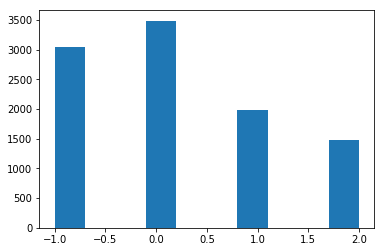

In [11]:
#2.a generatae discrete distribution
rand_disc=rand_lgm.copy()
rand_disc[(rand_disc <= 0.3)] = -1
rand_disc[(rand_disc > 0.3) & (rand_disc <= 0.65)] = 0
rand_disc[(rand_disc > 0.65) & (rand_disc <= 0.85)] = 10 # not confuse with the original 1's
rand_disc[(rand_disc > 0.85) & (rand_disc <= 1)] = 2          
rand_disc[(rand_disc == 10)] = 1


# 2 (b)
# draw histogram and compute the empirical mean and std
q2a = plt.hist(rand_disc)
mean_disc = np.mean(rand_disc)
std_disc = np.std(rand_disc)

3. Use the idea of part (a) of Question 1 to do the following:
(a) Generate 1,000 random numbers with Binomial distribution with 𝑛=44 and 𝑝=0.64. (Hint: A random variable with Binomial distribution (𝑛,𝑝) is a sum of n Bernoulli (𝑝) distributed random variables, so you will need to generate 44,000 Uniformly distributed random numbers, to start with).
(b) Draw the histogram. Compute the probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: 𝑃(𝑋≥40). Use any statistics textbook or online resources for the exact number for the above probability and compare it with your finding and comment.

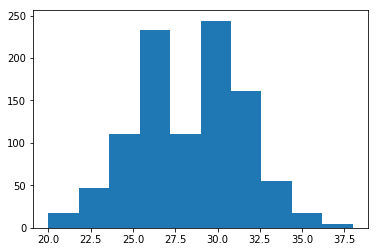

In [12]:
# Generate 1,000 random numbers with Binomial distribution 
# with 𝑛=44 and p = 0.64
# generate 44,000 uniformly distributed random variables
rand_bin_uni = lgm(1,44000)
# convert them into binomial
rand_bin_uni[rand_bin_uni <= 0.64] = -1
rand_bin_uni[rand_bin_uni > 0.64] = 0
rand_bin_uni[rand_bin_uni == -1] = 1
rand_bin_uni = rand_bin_uni.reshape((44,1000))
rand_bin = sum(rand_bin_uni)
                            
# 3 (b) 
# draw historgram
q3b = plt.hist(rand_bin)
# p (x>=40)
prob = sum(rand_bin >=40)/1000

# prob =0; according to online calculator, p(x>=40)=0

4. Use the numbers of part (a) of question 1 to do the following:
(a) Generate 10,000 Exponentially distributed random numbers with parameter 𝜆=1.5.
(b) Compute 𝑃(𝑋≥1) and 𝑃(𝑋≥4).
(c) Compute the empirical mean and the standard deviation of the sequence of 10,000 numbers generated above in part (a). Draw the histogram by using the 10,000 numbers of part (a).

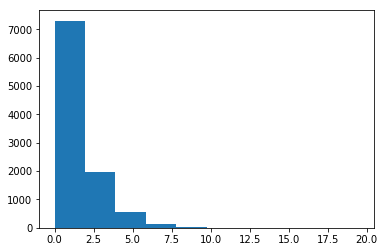

In [13]:
# Generate 10,000 Exponentially distributed random numbers with parameter 𝜆=1.5                                            
rand_exp = -1.5*np.log(1-rand_lgm)
# 4 (b)
# Compute 𝑃(𝑋≥1) and 𝑃(𝑋≥4).
prob_1 = sum(rand_exp >= 1)/10000   
prob_4 = sum(rand_exp >= 4)/10000
            
# 4 (c) empirical mean and std; draw histogram
mean_exp = np.mean(rand_exp)
std_exp = np.std(rand_exp)
q4c = plt.hist(rand_exp)

5. Use the idea of part (a) of Question 1 to do the following:
(a) Generate 5,000 Uniformly distributed random numbers on [0,1].
(b) Generate 5,000 Normally distributed random numbers with mean 0 and variance 1, by Box- Muller Method.
(c) Compute the empirical mean and the standard deviation of the sequence of numbers generated above of part (b).
(d) Now use the Polar-Marsaglia method to do the same as in (b).
Note: Here you will not have the same number of random variables as in (b).
(e) Compute the empirical mean and the standard deviation of the sequence of numbers generated above of part (d).
(f) Now compare the efficiencies of the two above-algorithms, by comparing the execution times to generate 5,000 normally distributed random numbers by the two methods. Which one is more efficient? If you do not see a clear difference, you need to increase the number of generated realizations of random variables to 10,000, 20,000, etc.

Box-Milluer method is faster.


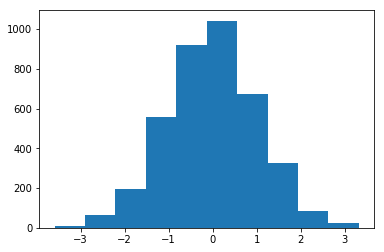

In [14]:
# 5 (a)####################################################################
#  Generate 5,000 Uniformly distributed random numbers on [0,1] using LGM
rand_uni = lgm(1,5000)

# 5(b) Generate 5,000 N(0,1) by Box-Muller
def norm_bm(x0,n):
    rand_uni = lgm(x0,n)
    rand_uni1 = rand_uni[:int(n/2)]
    rand_uni2 = rand_uni[int(n/2):]
    z1 = np.sqrt(-2*np.log(rand_uni1))*np.cos(2*np.pi*rand_uni2)
    z2 = np.sqrt(-2*np.log(rand_uni1))*np.sin(2*np.pi*rand_uni2)
    rand_norm_bm = np.concatenate([z1,z2])
    return rand_norm_bm

rand_norm_bm = norm_bm(3,5000)
# 5(c) compute mean and std of 5(b)
mean_norm_bm = np.mean(rand_norm_bm)
std_norm_bm = np.std(rand_norm_bm)

# 5(d) Polar-Marsaglia method
n=5000
rand_norm_pm = np.empty(n)
a = 7**5
m = 2**31-1
x1 = 1
x2 = 2
i = 0
j=0
x = lgm(1,n)
# if use the same lgm series
x1 = x[:int(n/2)]
x2 = x[int(n/2):]
### if use built in 
#x1 = np.random.uniform(0,1,5000)
#x2 = np.random.uniform(0,1,5000)
v1 = 2*x1-1
v2=2*x2-1
w = v1**2+v2**2
w_u=w[w<=1]
v1_u=v1[w<=1]
v2_u=v2[w<=1]
z1 = v1_u*np.sqrt(-2*np.log(w_u)/w_u)
z2=v2_u*np.sqrt(-2*np.log(w_u)/w_u)
z = np.concatenate([z1,z2])
# histogram
q5d = plt.hist(z)

# 5(e) compute mean and std of 5(d)
mean_norm_pm = np.mean(z)
std_norm_pm =np.std(z)

# 5(f) compare the efficiency of the two methods
# Polar-Marsaglia method (generate exactly n rv)
def norm_pm(x0,n):
    rand_norm_pm = np.zeros(n)
    a = 7**5
    m = 2**31-1
    x = x0
    i = 0
    while (i <n):
        x = (a*x) % m
        u1 = x/m
        x = (a*x) % m
        u2 = x/m
        v1 = 2*u1-1
        v2 = 2*u2-1
        w = v1**2+v2**2
        if w <= 1:         
            rand_norm_pm[i]=v1*np.sqrt(-2*np.log(w)/w)
            rand_norm_pm[i+1]=v2*np.sqrt(-2*np.log(w)/w)
            i = i + 2
   
    return rand_norm_pm

rand_norm_pm = norm_pm(3,5000)

# time of bm method
start=timer()
norm_bm(1,20000)
end=timer()
time_bm = end-start
# time of pm method
start=timer()
norm_pm(1,20000)
end=timer()
time_pm = end-start

print("Box-Milluer method is faster.")
